Data loading

In [1]:
import pandas as pd
import numpy as np


In [2]:
import os
os.listdir('../../data')
assert 'out_breed.csv' in os.listdir('../../data') 

In [3]:
breeds = pd.read_csv('../../data/out_breed.csv')
colors = pd.read_csv('../../data/out_color.csv')
states = pd.read_csv('../../data/out_state.csv')
train  = pd.read_csv('../../data/out_train.csv')
test   = pd.read_csv('../../data/out_test.csv')
sub    = pd.read_csv('../../data/out_submission.csv')

Model

In [5]:
from knnModel import PredictiveModel

In [11]:
from sklearn import neighbors

### Cross-validation: parameter tuning
Followed https://www.ritchieng.com/machine-learning-cross-validation/
Goal: select best k value for knn on kaggle-pets data

In [8]:
from sklearn.model_selection import cross_val_score

#Preparing the data

In [9]:
"""
this is a really primitive data cleaning to make KNN works: we drop the followings
- AdoptionSpeed, is target
- Unnamed:0, dataset_type, is useless
- Name, RescuerId, Description, PhotoAmt, VideoAmt, PetID: this are all strings valued not able to be processed by KNN
"""
X = train.drop(["AdoptionSpeed", "Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)
X_test = test.drop(["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)

"""
Y is our target value, Adoption Speed can be a value [1,2,3,4]
"""
Y = train['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

In [14]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier

knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many

scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
print(scores)

[0.33666667 0.34       0.342      0.31933333 0.326      0.32533333
 0.33133333 0.31909212 0.33311081 0.3253173 ]


cross_val_score executes the first 4 steps of k-fold cross-validation steps which I have broken down to 7 steps here in detail

1.Split the dataset (X and y) into K=10 equal partitions (or "folds")

2.Train the KNN model on union of folds 2 to 10 (training set)

3.Test the model on fold 1 (testing set) and calculate testing accuracy

4.Train the KNN model on union of fold 1 and fold 3 to 10 (training set)

5.Test the model on fold 2 (testing set) and calculate testing accuracy

6.It will do this on 8 more times

7.When finished, it will return the 10 testing accuracy scores as a numpy array

In [15]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()

print(scores.mean())

0.32981869051855384


The goal is to find the optimal value for k

In [17]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.3255489059115115, 0.29106844057496395, 0.3208154837489844, 0.32301668758076907, 0.32981869051855384, 0.3351566538506475, 0.34062563524913647, 0.3436270163825649, 0.34115852390138535, 0.34182483471616126, 0.34402652603828043, 0.34369221326498123, 0.3428242558994268, 0.3443591902987104, 0.3458937704514503, 0.3485619060105079, 0.34689403818763476, 0.3468271483777524, 0.34556106017107646, 0.34729305785580955, 0.3484267026264366, 0.3510299536322311, 0.3503630197644956, 0.350560792434892, 0.3497598142435293, 0.3498953287081506, 0.35142723702857426, 0.3495605701835357, 0.3496926129963532, 0.35049448251197546]


In [18]:
# in essence, this is basically running the k-fold cross-validation method 30 times because we want to run through K values from 1 to 30
# we should have 30 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.35142723702857426


Text(0, 0.5, 'Cross-validated accuracy')

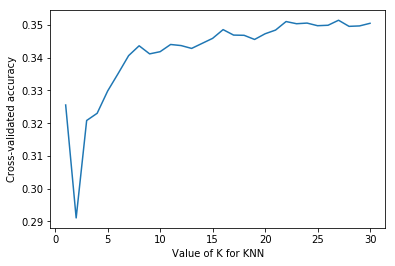

In [19]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')